In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Prepare data

## Clusters

In [2]:
cluster_class_df = pd.read_feather("../../../../GitHub/HFZoo/data/keys/cluster_classifications.feather")
cluster_class_filter_df = cluster_class_df
classification_order = [
    "Value",
    "Investment",
    "Low Risk",
    "Profitability",
    "Quality",
    "Leverage",
    "Momentum",
    "Size",
    "Profit Growth",
    "Accruals",
    "Debt Issuance",
    "Skewness",
    "Seasonality",
]
assign_alt_df = cluster_class_filter_df.assign(
        classification=pd.Categorical(
            cluster_class_filter_df["cluster_avg"], categories=classification_order, ordered=True
        )
    )
factor_order = (
    assign_alt_df
    .sort_values(by=["classification", "rho_avg"], ascending = [True, False])["factor"]
    .values
)

## Variable names

In [3]:
# List of variable names
variable_names = pd.read_csv('../../results/main_names/variables_names.csv').columns.to_list()

In [4]:
## Unpack variable names and merge with classifications
variable_names_key_df = pd.DataFrame(variable_names, columns=["name"])

def get_regressor_time_label(x):

    key = str(x.split("__")[-1].split("_")[1])
    if key == "1":
        return "15-Minute Lag"
    elif key == "4":
        return "Hour Lag"
    elif key == "1d":
        return "Day Lag"
    else:
        raise Exception("Unknown: ", str(x), " ", key)


variable_names_key_df["factor"] = variable_names_key_df["name"].apply(
    lambda x: "__".join(x.split("__")[:2])
)
variable_names_key_df["component_label"] = variable_names_key_df["name"].apply(
    lambda x: x.split("__")[2].split("_")[0]
)
variable_names_key_df["time_label"] = variable_names_key_df["name"].apply(
    lambda x: get_regressor_time_label(x)
)
variable_names_key_df = variable_names_key_df.merge(assign_alt_df, on=["factor"], how="left")
variable_names_key_df

,name,factor,component_label,time_label,cluster_avg,rho_avg,cluster_max,rho_max,Classification,classification
0,jkp__debt_me__jmp_4_1_lagged_intradaily_avg,jkp__debt_me,jmp,Hour Lag,Value,0.764471,Value,1.000000,Value,Value
1,cz__cashprod__jmp_1_1_lagged_intradaily_avg,cz__cashprod,jmp,15-Minute Lag,Quality,0.629841,Quality,0.870451,Quality,Quality
2,jkp__seas_16_20na__jmp_4_1_lagged_intradaily_avg,jkp__seas_16_20na,jmp,Hour Lag,Seasonality,0.124152,Seasonality,1.000000,Seasonality,Seasonality
3,cz__indretbig__jmp_1d_1_lagged_daily_avg,cz__indretbig,jmp,Day Lag,Momentum,0.071465,Momentum,0.236714,Momentum,Momentum
4,ind48__24_aero__jmp_1d_1_lagged_daily_avg,ind48__24_aero,jmp,Day Lag,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1627,ind48__38_paper__cts_1d_1_lagged_daily_avg,ind48__38_paper,cts,Day Lag,NaN,NaN,NaN,NaN,NaN,NaN
1628,ind48__9_hshld__jmp_1_1_lagged_intradaily_avg,ind48__9_hshld,jmp,15-Minute Lag,NaN,NaN,NaN,NaN,NaN,NaN
1629,cz__betatailrisk__jmp_1_1_lagged_intradaily_avg,cz__betatailrisk,jmp,15-Minute Lag,Leverage,0.300662,Leverage,0.498742,Leverage,Leverage
1630,ff__hml__cts_1_1_lagged_intradaily_avg,ff__hml,cts,15-Minute Lag,NaN,NaN,NaN,NaN,NaN,NaN


## Results

In [5]:
# Results for Elastic Net
with open('../../results/main/Enet_log.pkl', 'rb') as fp:   # Unpickling
    enet_results = pickle.load(fp)

In [6]:
# Parameter estimates
oos_period_labels = [
    "2004-2006",
    "2006-2008",
    "2008-2010",
    "2010-2012",
    "2012-2014",
    "2014-2016",
    "2016-2018",
    "2018-2020",
]

parameters_array = np.zeros([1632, 8])
for i in range(0, 8):
    parameters_array[:, i] = enet_results.iloc[:, 4][i + 4][0]

In [7]:
# As a dataframe
parameters_df = pd.DataFrame(parameters_array.T, index = oos_period_labels, columns = variable_names)
parameters_df

,jkp__debt_me__jmp_4_1_lagged_intradaily_avg,cz__cashprod__jmp_1_1_lagged_intradaily_avg,jkp__seas_16_20na__jmp_4_1_lagged_intradaily_avg,cz__indretbig__jmp_1d_1_lagged_daily_avg,ind48__24_aero__jmp_1d_1_lagged_daily_avg,ff__cma__cts_4_1_lagged_intradaily_avg,cz__earnsupbig__cts_4_1_lagged_intradaily_avg,jkp__prc_highprc_252d__cts_1d_1_lagged_daily_avg,jkp__dsale_dinv__cts_1d_1_lagged_daily_avg,jkp__dolvol_126d__cts_1_1_lagged_intradaily_avg,...,jkp__pi_nix__jmp_4_1_lagged_intradaily_avg,jkp__eqnpo_me__jmp_4_1_lagged_intradaily_avg,ind48__10_clths__jmp_1_1_lagged_intradaily_avg,jkp__prc_highprc_252d__jmp_1_1_lagged_intradaily_avg,jkp__gp_atl1__cts_1_1_lagged_intradaily_avg,ind48__38_paper__cts_1d_1_lagged_daily_avg,ind48__9_hshld__jmp_1_1_lagged_intradaily_avg,cz__betatailrisk__jmp_1_1_lagged_intradaily_avg,ff__hml__cts_1_1_lagged_intradaily_avg,cz__orgcap__jmp_4_1_lagged_intradaily_avg
2004-2006,-0.0,0.00000,-0.0,-0.000000,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.000000,-0.0
2006-2008,-0.0,-0.00000,-0.0,0.000000,-0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.000000,0.0
2008-2010,0.0,0.00000,0.0,0.000000,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.000000,0.0
2010-2012,-0.0,-0.00106,0.0,-0.000176,0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.000368,0.0
2012-2014,-0.0,0.00000,0.0,-0.000000,0.0,-0.0,0.0,0.0,-0.0,0.0,...,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.000000,-0.0
2014-2016,0.0,0.00000,-0.0,-0.000000,-0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.000000,0.0
2016-2018,-0.0,0.00000,0.0,0.000000,0.0,0.0,-0.0,0.0,-0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.000000,0.0
2018-2020,0.0,-0.00000,-0.0,0.000000,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.000000,0.0


# Clustered variable importance

In [32]:
## Absolute average of beta across cluster
parameters_cluster_abs_avg_df = pd.DataFrame(
    [], index=parameters_df.index, columns=classification_order
)
parameters_cluster_jmp_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_cts_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_15min_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_1hour_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_1day_abs_avg_df = parameters_cluster_abs_avg_df.copy()

def compute_cluster_variable_importance(df):
    # return df.abs().apply(lambda x: np.sum(x.loc[x != 0]), axis=1).fillna(0)
    return df.abs().apply(lambda x: np.sum(x), axis=1).fillna(0)
    

for cluster in classification_order:
    cluster_factor_list = variable_names_key_df.query("classification == @cluster")[
        "name"
    ].to_list()
    parameters_cluster_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[cluster_factor_list]
    )
    parameters_cluster_jmp_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[[x for x in cluster_factor_list if "__jmp" in x]]
    )
    parameters_cluster_cts_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[[x for x in cluster_factor_list if "__cts" in x]]
    )
    parameters_cluster_15min_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query(
                "classification == @cluster & time_label == '15-Minute Lag'"
            )["name"].to_list()
        ]
    )
    parameters_cluster_1hour_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query("classification == @cluster & time_label == 'Hour Lag'")[
                "name"
            ].to_list()
        ]
    )
    parameters_cluster_1day_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query("classification == @cluster & time_label == 'Day Lag'")[
                "name"
            ].to_list()
        ]
    )

In [33]:
# Divide by the average beta
parameters_cluster_abs_avg_relative_df = parameters_cluster_abs_avg_df.divide(
    parameters_cluster_abs_avg_df.mean(axis=1), axis=0
).fillna(0)
parameters_cluster_jmp_abs_relative_avg_df = parameters_cluster_jmp_abs_avg_df.divide(
    parameters_cluster_jmp_abs_avg_df.mean(axis=1), axis=0
).fillna(0)
parameters_cluster_cts_abs_relative_avg_df = parameters_cluster_cts_abs_avg_df.divide(
    parameters_cluster_cts_abs_avg_df.mean(axis=1), axis=0
).fillna(0)

## Group Importance

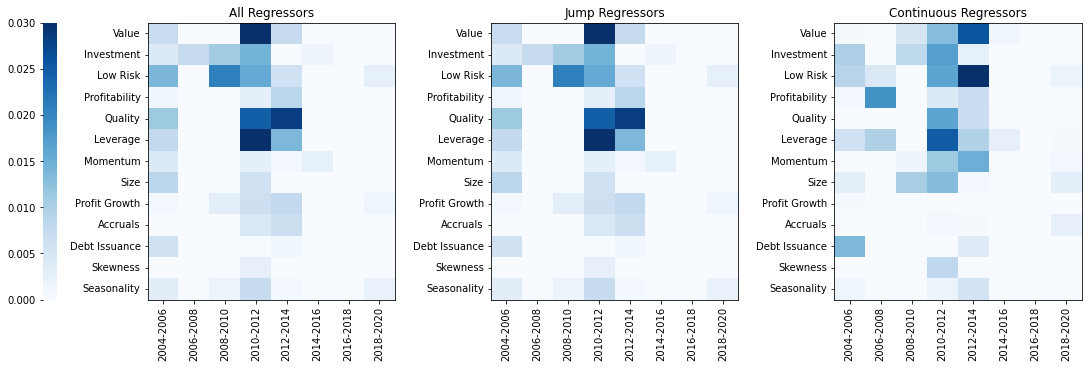

In [37]:
gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[1], wspace=0.05)
fig, axd = plt.subplot_mosaic(
    [["left", "center", "right"]], gridspec_kw=gs_kw, figsize=(15, 5), constrained_layout=True
)


# Settings
vmax = (
    pd.concat(
        [
            parameters_cluster_abs_avg_df,
            parameters_cluster_jmp_abs_avg_df,
            parameters_cluster_cts_abs_avg_df,
        ]
    )
    .max()
    .max()
)
vmax =0.03
center = None
cmap = "Blues"


ax = axd["left"]
res = sns.heatmap(
    parameters_cluster_jmp_abs_avg_df.T,
    cmap=cmap,
    vmax=vmax,
    center=center,
    cbar_kws={"location": "left"},
    ax=ax,
)
ax.set_title("All Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["center"]
res = sns.heatmap(
    parameters_cluster_jmp_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("Jump Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["right"]
res = sns.heatmap(
    parameters_cluster_cts_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("Continuous Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

# plt.tight_layout()
plt.savefig("../../docs/exhibits/figures/variable_importance_beta_abs_sum_component.pdf")

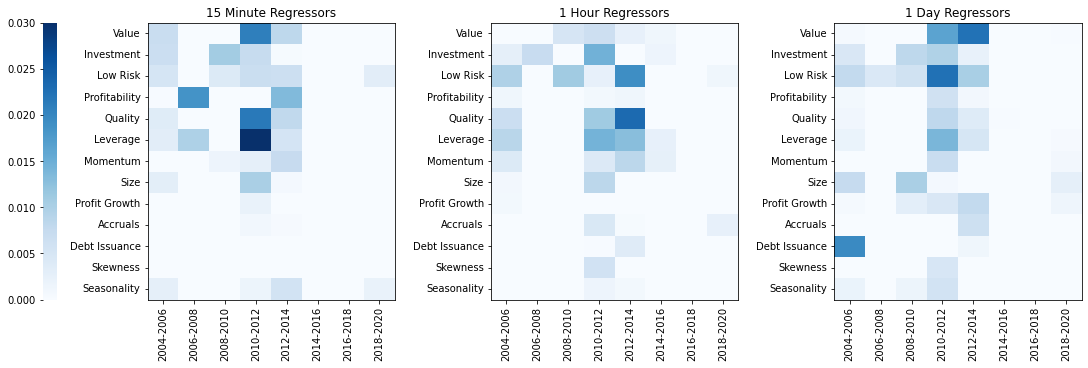

In [24]:
gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[1], wspace=0.05)
fig, axd = plt.subplot_mosaic(
    [["left", "center", "right"]], gridspec_kw=gs_kw, figsize=(15, 5), constrained_layout=True
)


# Settings
vmax = (
    pd.concat(
        [
            parameters_cluster_15min_abs_avg_df,
            parameters_cluster_1hour_abs_avg_df,
            parameters_cluster_1day_abs_avg_df,
        ]
    )
    .max()
    .max()
)
vmax = 0.03
center = None
cmap = "Blues"


ax = axd["left"]
res = sns.heatmap(
    parameters_cluster_15min_abs_avg_df.T,
    cmap=cmap,
    vmax=vmax,
    center=center,
    cbar_kws={"location": "left"},
    ax=ax,
)
ax.set_title("15 Minute Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["center"]
res = sns.heatmap(
    parameters_cluster_1hour_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("1 Hour Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["right"]
res = sns.heatmap(
    parameters_cluster_1day_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("1 Day Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

# plt.tight_layout()
plt.savefig("../../docs/exhibits/figures/variable_importance_beta_abs_sum_frequency.pdf")

# Clustered variable importance - count

In [25]:
## Absolute average of beta across cluster
parameters_cluster_abs_avg_df = pd.DataFrame(
    [], index=parameters_df.index, columns=classification_order
)
parameters_cluster_jmp_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_cts_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_15min_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_1hour_abs_avg_df = parameters_cluster_abs_avg_df.copy()
parameters_cluster_1day_abs_avg_df = parameters_cluster_abs_avg_df.copy()

def compute_cluster_variable_importance(df):
    # return df.abs().apply(lambda x: np.sum(x.loc[x != 0]), axis=1).fillna(0)
    return df.abs().apply(lambda x: np.sum(x != 0), axis=1).fillna(0)
    

for cluster in classification_order:
    cluster_factor_list = variable_names_key_df.query("classification == @cluster")[
        "name"
    ].to_list()
    parameters_cluster_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[cluster_factor_list]
    )
    parameters_cluster_jmp_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[[x for x in cluster_factor_list if "__jmp" in x]]
    )
    parameters_cluster_cts_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[[x for x in cluster_factor_list if "__cts" in x]]
    )
    parameters_cluster_15min_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query(
                "classification == @cluster & time_label == '15-Minute Lag'"
            )["name"].to_list()
        ]
    )
    parameters_cluster_1hour_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query("classification == @cluster & time_label == 'Hour Lag'")[
                "name"
            ].to_list()
        ]
    )
    parameters_cluster_1day_abs_avg_df.loc[:, cluster] = compute_cluster_variable_importance(
        parameters_df[
            variable_names_key_df.query("classification == @cluster & time_label == 'Day Lag'")[
                "name"
            ].to_list()
        ]
    )

In [26]:
# Divide by the average beta
parameters_cluster_abs_avg_relative_df = parameters_cluster_abs_avg_df.divide(
    parameters_cluster_abs_avg_df.mean(axis=1), axis=0
).fillna(0)
parameters_cluster_jmp_abs_relative_avg_df = parameters_cluster_jmp_abs_avg_df.divide(
    parameters_cluster_jmp_abs_avg_df.mean(axis=1), axis=0
).fillna(0)
parameters_cluster_cts_abs_relative_avg_df = parameters_cluster_cts_abs_avg_df.divide(
    parameters_cluster_cts_abs_avg_df.mean(axis=1), axis=0
).fillna(0)

## Group Importance

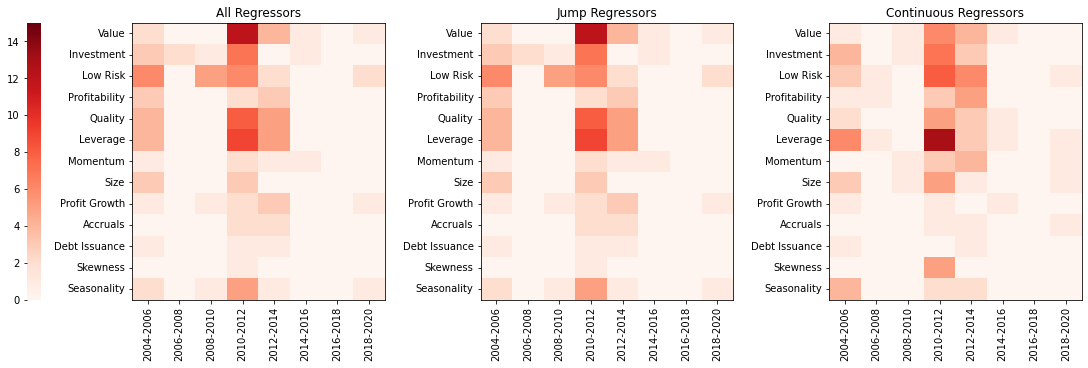

In [30]:
gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[1], wspace=0.05)
fig, axd = plt.subplot_mosaic(
    [["left", "center", "right"]], gridspec_kw=gs_kw, figsize=(15, 5), constrained_layout=True
)


# Settings
vmax = (
    pd.concat(
        [
            parameters_cluster_abs_avg_df,
            parameters_cluster_jmp_abs_avg_df,
            parameters_cluster_cts_abs_avg_df,
        ]
    )
    .max()
    .max()
)
vmax = 15
center = None
cmap = "Reds"


ax = axd["left"]
res = sns.heatmap(
    parameters_cluster_jmp_abs_avg_df.T,
    cmap=cmap,
    vmax=vmax,
    center=center,
    cbar_kws={"location": "left"},
    ax=ax,
)
ax.set_title("All Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["center"]
res = sns.heatmap(
    parameters_cluster_jmp_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("Jump Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["right"]
res = sns.heatmap(
    parameters_cluster_cts_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("Continuous Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

# plt.tight_layout()
plt.savefig("../../docs/exhibits/figures/variable_importance_beta_count_component.pdf")

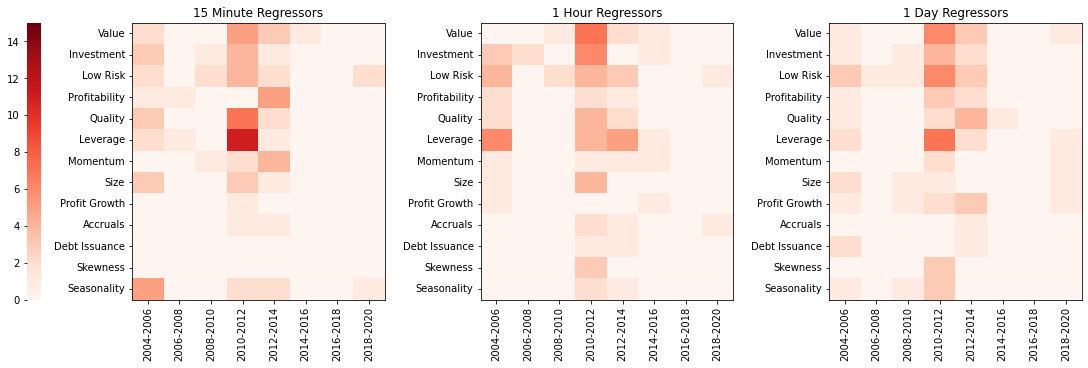

In [31]:
gs_kw = dict(width_ratios=[1, 1, 1], height_ratios=[1], wspace=0.05)
fig, axd = plt.subplot_mosaic(
    [["left", "center", "right"]], gridspec_kw=gs_kw, figsize=(15, 5), constrained_layout=True
)


# Settings
vmax = (
    pd.concat(
        [
            parameters_cluster_15min_abs_avg_df,
            parameters_cluster_1hour_abs_avg_df,
            parameters_cluster_1day_abs_avg_df,
        ]
    )
    .max()
    .max()
)
vmax = 15
center = None
cmap = "Reds"


ax = axd["left"]
res = sns.heatmap(
    parameters_cluster_15min_abs_avg_df.T,
    cmap=cmap,
    vmax=vmax,
    center=center,
    cbar_kws={"location": "left"},
    ax=ax,
)
ax.set_title("15 Minute Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["center"]
res = sns.heatmap(
    parameters_cluster_1hour_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("1 Hour Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

ax = axd["right"]
res = sns.heatmap(
    parameters_cluster_1day_abs_avg_df.T, cmap=cmap, vmax=vmax, center=center, cbar=False, ax=ax
)
ax.set_title("1 Day Regressors")
# make frame visible
for _, spine in res.spines.items():
    spine.set_visible(True)

# plt.tight_layout()
plt.savefig("../../docs/exhibits/figures/variable_importance_beta_count_frequency.pdf")

# Scratch

In [103]:
parameters = enet_results.iloc[:, 4]
par = np.zeros([1632, 8])
for i in range(0, 8):
    par[:, i] = parameters[i + 4][0]
colnames = [
    "2004-2006",
    "2006-2008",
    "2008-2010",
    "2010-2012",
    "2012-2014",
    "2014-2016",
    "2016-2018",
    "2018-2020",
]
par_df = pd.DataFrame(par, columns=colnames, index = variable_names)
par_df["combine"] = sum(abs(par.T))
par_sort = par_df.sort_values(by="combine", ascending=False)

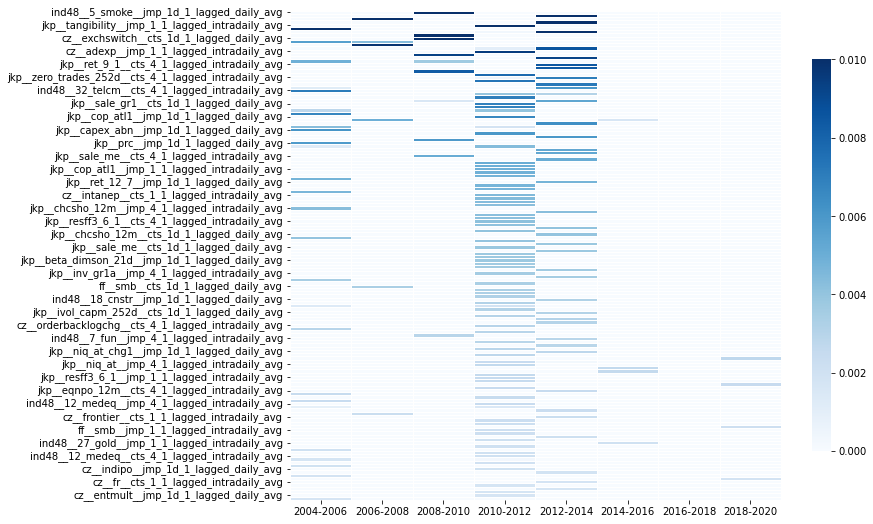

In [104]:
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(
    abs(par_sort.iloc[0:150, 0:8]),
    cmap="Blues",
    vmax=0.01,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
)

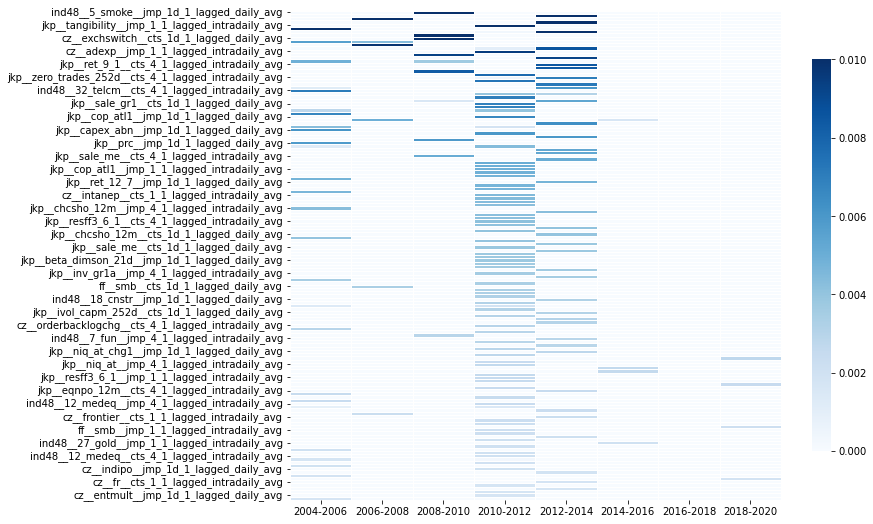

In [105]:
fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(
    abs(par_sort.drop(['combine'], axis=1).head(150)),
    cmap="Blues",
    vmax=0.01,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
)